In [1]:
!pip install librosa
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install pyyaml h5py
!pip install seaborn

In [2]:
import os
import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.callbacks import Callback
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
DATA_DIR = './dataset'
DATA_DIR_R2APPEND = DATA_DIR + "/"
audio_files = os.listdir(DATA_DIR)
print(audio_files)
print(DATA_DIR_R2APPEND)

['F_MAG01_EU_FN_FED01_106.wav', 'I_NUL01_MC_MI_SIM01_304.wav', 'I_MEG01_MC_FI_SIM01_304.wav', 'B_CAN01_EU_FN_GIA01_205.wav', 'F_MAG01_EU_FN_FED01_304.wav', 'F_MIN01_EU_FN_BEN01_102.wav', 'F_WHO01_MC_FI_SIM01_304.wav', 'F_IND01_EU_FN_ELI01_302.wav', 'F_BAC01_MC_MN_SIM01_103.wav', 'I_WHO01_MC_FI_SIM01_103.wav', 'I_BLE01_EU_FN_DEL01_103.wav', 'F_BAC01_MC_MN_SIM01_301.wav', 'I_BLE01_EU_FN_DEL01_301.wav', 'I_WHO01_MC_FI_SIM01_301.wav', 'B_BRA01_MC_MN_SIM01_301.wav', 'I_NIG01_MC_MN_SIM01_201.wav', 'F_MEG01_MC_FI_SIM01_301.wav', 'I_MIN01_EU_FN_BEN01_106.wav', 'B_MAT01_EU_FN_RIT01_101.wav', 'I_WHO01_MC_FI_SIM01_116.wav', 'I_WHO01_MC_FI_SIM01_102.wav', 'I_BLE01_EU_FN_DEL01_102.wav', 'F_BAC01_MC_MN_SIM01_102.wav', 'F_MIN01_EU_FN_BEN01_103.wav', 'B_CAN01_EU_FN_GIA01_210.wav', 'F_MAG01_EU_FN_FED01_305.wav', 'I_BAC01_MC_MN_SIM10_102.wav', 'B_CAN01_EU_FN_GIA01_204.wav', 'I_MEG01_MC_FI_SIM01_305.wav', 'F_IND01_EU_FN_ELI01_101.wav', 'B_REG01_EU_FN_GIO01_102.wav', 'F_MAG01_EU_FN_FED01_105.wav', 'F_IND0

In [4]:
# 'F' : 'Waiting For Food', 'I' : 'Isolated in unfamiliar Environment', 'B' : 'Brushing'
emission_context = {'F' : [], 'I' : [], 'B' : []}

# breed (values: MC = Maine Coon; EU: European Shorthair);
breed = {'MC' : [], 'EU' : []}

for file in audio_files:
    split = file.split('_')
    if split[0] in emission_context.keys():
        emission_context.get(split[0]).append(file)

    if split[2] in breed.keys():
        breed.get(split[2]).append(file)


In [5]:
wait_food_ex = DATA_DIR_R2APPEND + emission_context.get('F')[2]
data , sample_rate = librosa.load(wait_food_ex)
librosa.load(wait_food_ex)
ipd.Audio(wait_food_ex)

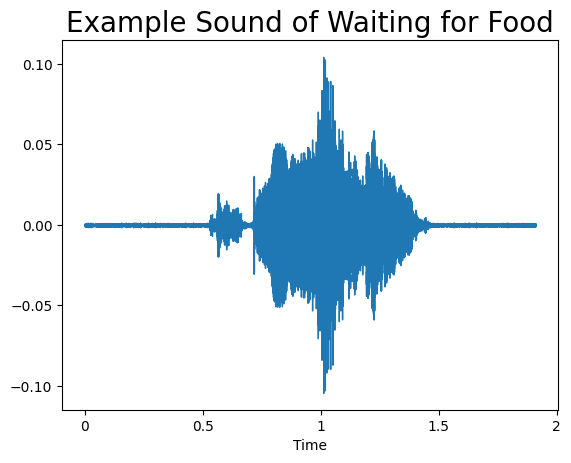

In [6]:
librosa.display.waveshow(data)
plt.title("Example Sound of Waiting for Food", fontsize = 20);

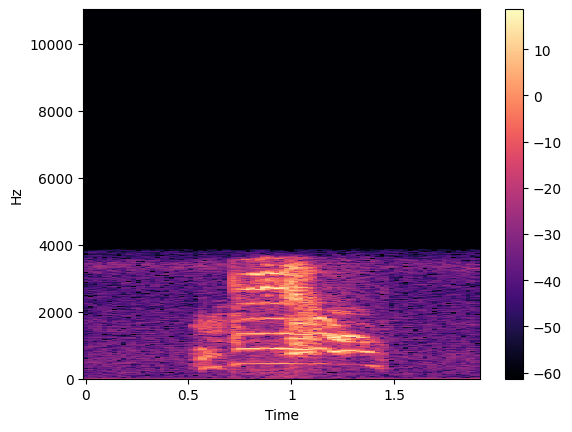

In [7]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [8]:
isolated_ex = DATA_DIR_R2APPEND + emission_context.get('I')[0]
data , sample_rate  = librosa.load(isolated_ex)
librosa.load(isolated_ex)
ipd.Audio(isolated_ex)

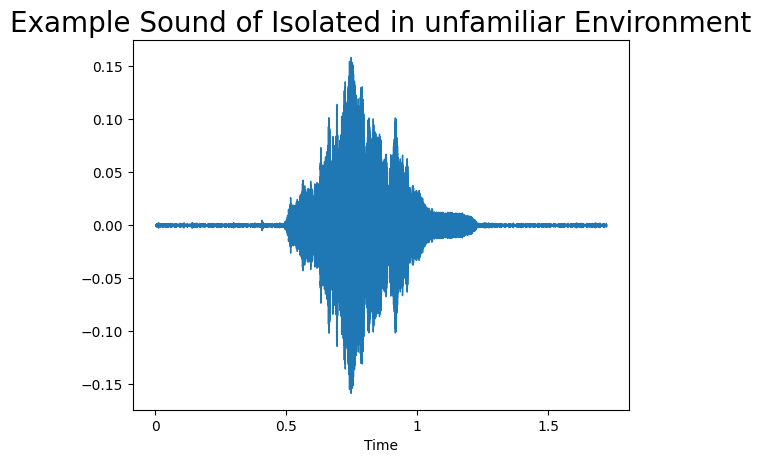

In [9]:
librosa.display.waveshow(data)
plt.title("Example Sound of Isolated in unfamiliar Environment", fontsize = 20);

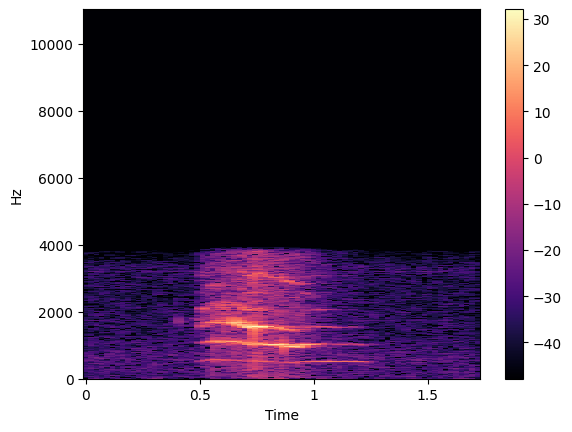

In [10]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [11]:
brushing_ex = DATA_DIR_R2APPEND + emission_context.get('B')[1]
data , sample_rate  = librosa.load(brushing_ex)
librosa.load(brushing_ex)
ipd.Audio(brushing_ex)

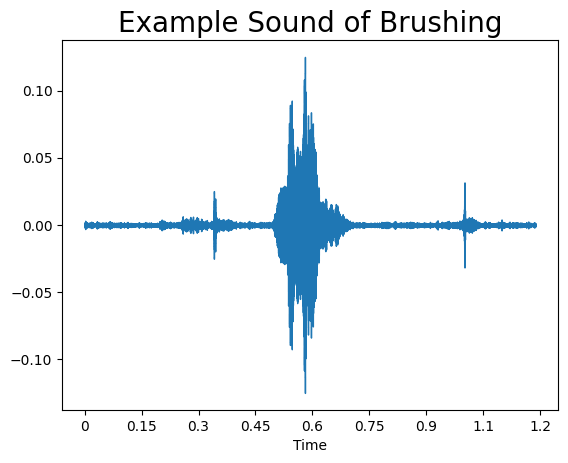

In [12]:
librosa.display.waveshow(data)
plt.title("Example Sound of Brushing", fontsize = 20);

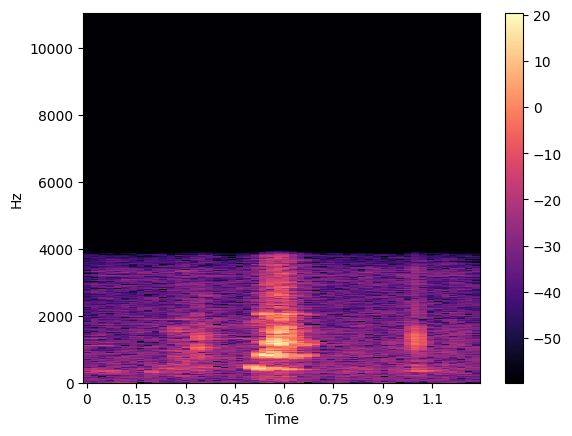

In [13]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [14]:
len_value =[]
for i in emission_context.values():
    len_value.append(len(i))
len_value

[92, 221, 127]

In [15]:
# rename keys of dictionary
emission_context['Waiting For Food'] = emission_context.pop('F')
emission_context['Isolated in unfamiliar Environment'] = emission_context.pop('I')
emission_context['Brushing'] = emission_context.pop('B')

Text(0, 0.5, 'Number of cat sound')

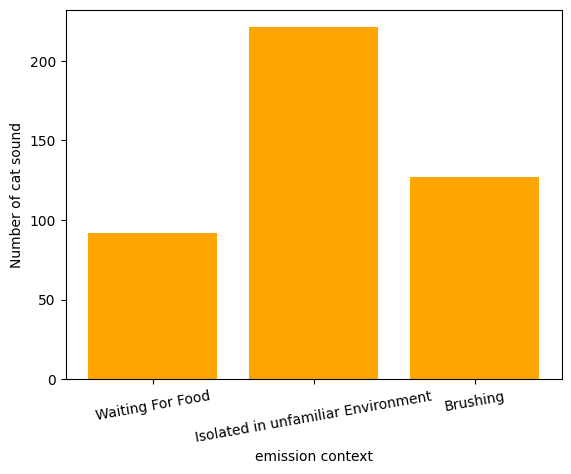

In [16]:
x = emission_context.keys()
y = len_value
plt.bar(x, y, color ='orange')
plt.xticks(rotation=10)
plt.xlabel("emission context")
plt.ylabel("Number of cat sound")

Text(0, 0.5, 'Number of cat sound')

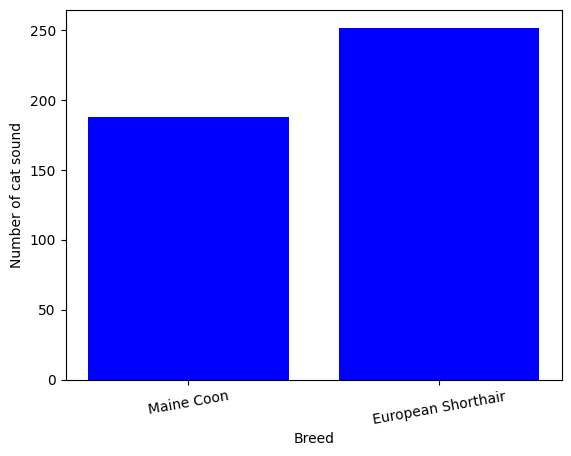

In [17]:
len_value =[]
for i in breed.values():
    len_value.append(len(i))

# rename keys of dictionary
breed['Maine Coon'] = breed.pop('MC')
breed['European Shorthair'] = breed.pop('EU')

x = breed.keys()
y = len_value
plt.bar(x, y, color ='blue')
plt.xticks(rotation=10)
plt.xlabel("Breed")
plt.ylabel("Number of cat sound")

In [18]:
def add_path(list_emission):
    path = []
    for i in range(len(list_emission)):
        path.append(DATA_DIR_R2APPEND + list_emission[i])
    return path


a = add_path(emission_context['Waiting For Food'])
b = add_path(emission_context['Isolated in unfamiliar Environment'])
c = add_path(emission_context['Brushing'])
emission = a+b+c
df = pd.DataFrame(emission, columns=['Emission'])

In [19]:
label_W = np.tile('Waiting For Food',92)
label_I = np.tile('Isolated in unfamiliar Environment',221)
label_B = np.tile('Brushing',127)

Label = np.append(label_W, np.append(label_I, label_B))
df['Label'] = Label

In [20]:
audio_array = []

for i in df['Emission']:
    x, sr = librosa.load(i, sr=44100)
    audio_array.append(x)

df['Data Arrays'] = audio_array

In [21]:
df

,Emission,Label,Data Arrays
0,./dataset/F_MAG01_EU_FN_FED01_106.wav,Waiting For Food,"[0.00074698473, 0.00083379645, 0.00081950426, ..."
1,./dataset/F_MAG01_EU_FN_FED01_304.wav,Waiting For Food,"[0.0002742477, 0.00027528516, 0.00023053022, 0..."
2,./dataset/F_MIN01_EU_FN_BEN01_102.wav,Waiting For Food,"[0.00018780562, 0.00026301446, 0.0003346339, 0..."
3,./dataset/F_WHO01_MC_FI_SIM01_304.wav,Waiting For Food,"[-7.6642915e-05, 6.907532e-05, 0.00028343982, ..."
4,./dataset/F_IND01_EU_FN_ELI01_302.wav,Waiting For Food,"[-0.0003997923, -0.00045362592, -0.00046286223..."
...,...,...,...
435,./dataset/B_CAN01_EU_FN_GIA01_209.wav,Brushing,"[8.190962e-05, 6.185479e-05, 1.3267127e-05, -6..."
436,./dataset/B_NIG01_MC_MN_SIM01_101.wav,Brushing,"[0.00042395567, 0.0005149865, 0.0005869713, 0...."
437,./dataset/B_CAN01_EU_FN_GIA01_208.wav,Brushing,"[0.00011133043, 9.6924916e-05, 5.1894043e-05, ..."
438,./dataset/B_WHO01_MC_FI_SIM01_203.wav,Brushing,"[0.00018561227, 0.00033786468, 0.0005424031, 0..."


In [22]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def pitch(data, sr):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=4)

In [23]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [24]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr=sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [25]:
x = []
y = []
for i in range(len(df)):
    feature=get_features(df['Emission'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(df['Label'].iloc[i])

In [26]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))

In [27]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y),random_state=0, shuffle=True, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1056, 162), (1056, 3), (264, 162), (264, 3))

In [28]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1056, 162, 1), (1056, 3), (264, 162, 1), (264, 3))

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.05, patience=3)
model = models.Sequential()
model.add(layers.Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(layers.MaxPooling1D((1)))
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.MaxPooling1D((1)))
model.add(layers.Conv1D(512, 3, activation='relu'))
model.add(layers.MaxPooling1D((1)))
model.add(layers.Conv1D(1024, 3, activation='relu'))
model.add(layers.MaxPooling1D((1)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='RMSprop',
             metrics=['accuracy'])

model.summary()

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 160, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 160, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 158, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 158, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 156, 512)       │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 156, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 154, 1024)      │     1,573,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 154, 1024)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 157696)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    80,740,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,972,163 (316.51 MB)

 Trainable params: 82,972,163 (316.51 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
t = time()
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 954ms/step - accuracy: 0.5929 - loss: 0.8562 - val_accuracy: 0.6288 - val_loss: 0.9891
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 945ms/step - accuracy: 0.6416 - loss: 0.7419 - val_accuracy: 0.5871 - val_loss: 0.9640
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 991ms/step - accuracy: 0.6658 - loss: 0.7045 - val_accuracy: 0.5758 - val_loss: 1.1864
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 93s 11s/step - accuracy: 0.6702 - loss: 0.7172 - val_accuracy: 0.6364 - val_loss: 1.0221
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 946ms/step - accuracy: 0.6938 - loss: 0.6826 - val_accuracy: 0.5795 - val_loss: 1.2806
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 265s 33s/step - accuracy: 0.6641 - loss: 0.7549 - val_accuracy: 0.6250 - val_loss: 1.0407
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 940ms/step - accuracy: 0.7157 - loss: 0.5926 - val_accuracy: 0.6212 - val_loss: 1.0181
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 942ms/step - accuracy: 0.7160 - loss: 0.6157 - val_accuracy: 0.7121 - val_loss: 

In [33]:
model.save('./modelv0.h5')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8074 - loss: 2.0133
Accuracy of our model on test data :  79.16666865348816 %


ValueError: x and y must have same first dimension, but have shapes (30,) and (50,)

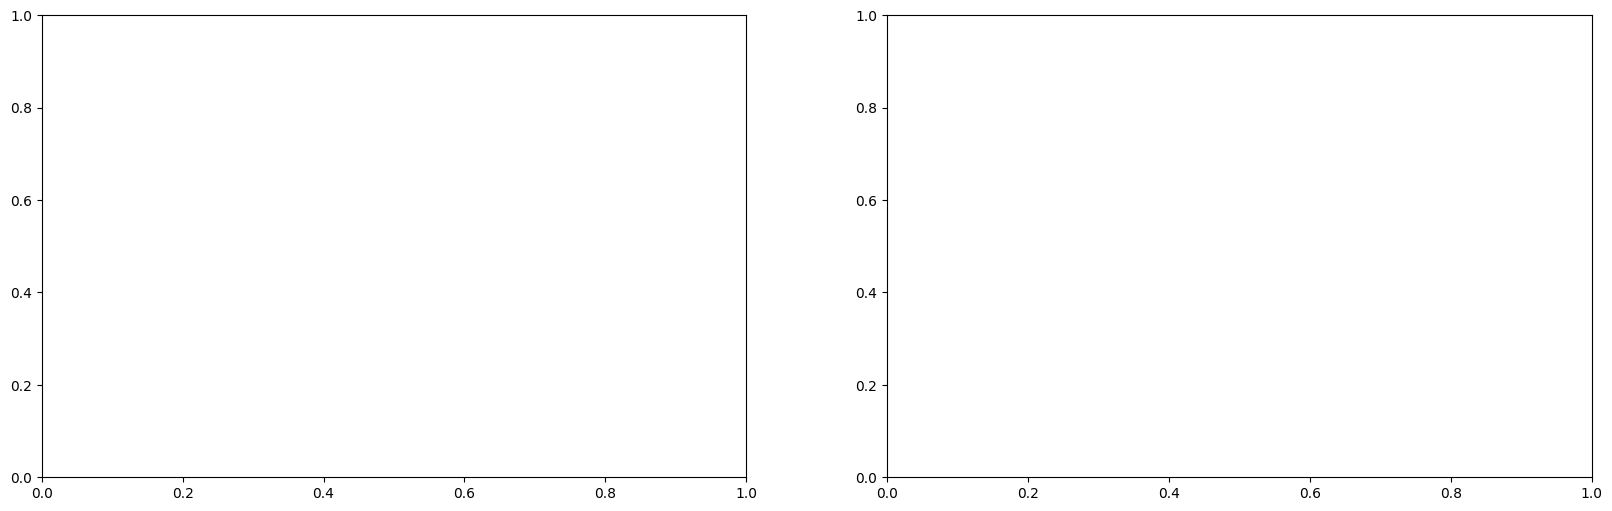

In [35]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 661ms/step


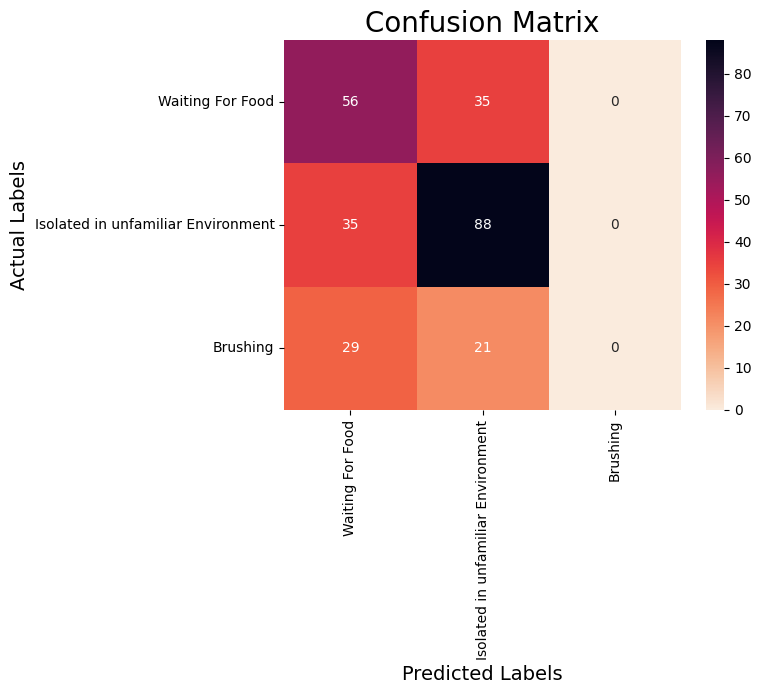

In [41]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Waiting For Food', 'Isolated in unfamiliar Environment', 'Brushing'], yticklabels = ['Waiting For Food', 'Isolated in unfamiliar Environment', 'Brushing'])
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))